Exploratory analysis

In [33]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
import warnings

In [2]:
# Assigning path
path = r'C:\Users\Shruthi\Desktop\immo_data.csv'

In [3]:
# Importing data
df= pd.read_csv(os.path.join(path, 'Rental_apartments.csv'))

In [4]:
# Checking
df.head()

Unnamed: 0                State  Service_charge  \
0           0  Nordrhein_Westfalen          245.00   
1           1      Rheinland_Pfalz          134.00   
2           2              Sachsen          255.00   
3           3              Sachsen           58.15   
4           4               Bremen          138.00   

                  Type_of_heating  Newly_Constructed  Balcony  Price_trend  \
0                 central_heating              False    False         4.62   
1  self_contained_central_heating              False     True         3.47   
2                   floor_heating               True     True         2.72   
3                district_heating              False     True         1.53   
4  self_contained_central_heating              False     True         2.46   

   Internet_speed  Total_rent  Construction_year  ...   Size  Pets  \
0            10.0       840.0             1965.0  ...  86.00   NaN   
1            10.0         NaN             1871.0  ...  89.00    no   
2             2.4      1300.0             2019.0  ...  83.80   NaN   
3            40.0         NaN             1964.0  ...  58.15   NaN   
4             NaN       903.0             1950.0  ...  84.97   NaN   

                   Street_name   Lift  Type_of_flat  No_of_Rooms  \
0   Sch&uuml;ruferstra&szlig;e  False  ground_floor          4.0   
1               no_information  False  ground_floor          3.0   
2                    Turnerweg   True     apartment          3.0   
3  Gl&uuml;ck-Auf-Stra&szlig;e  False         other          3.0   
4  Hermann-Henrich-Meier-Allee  False     apartment          3.0   

                         City Heating_costs  electricityBasePrice Date_posted  
0                     Schüren           NaN                   NaN       May19  
1              Böhl_Iggelheim           NaN                   NaN       May19  
2  Äußere_Neustadt_Antonstadt           NaN                   NaN       Oct19  
3                    Freiberg         87.23                   NaN       May19  
4           Neu_Schwachhausen           NaN                   NaN       Feb20  

[5 rows x 25 columns]

In [30]:
df.describe()

Unnamed: 0  Service_charge    Price_trend  Internet_speed  \
count  268850.000000   261941.000000  267018.000000   235492.000000   
mean   134424.500000      151.206113       3.389001       28.804928   
std     77610.454273      308.295790       1.964874       16.337151   
min         0.000000        0.000000     -12.330000        1.000000   
25%     67212.250000       95.000000       2.000000       10.000000   
50%    134424.500000      135.000000       3.390000       40.000000   
75%    201636.750000      190.000000       4.570000       40.000000   
max    268849.000000   146118.000000      14.920000      100.000000   

         Total_rent  Construction_year      Scout_ID  Parking_space  \
count  2.283330e+05      211805.000000  2.688500e+05   93052.000000   
mean   9.013315e+02        1966.400590  1.069697e+08       1.327634   
std    3.323833e+04          46.992207  1.250093e+07       8.361403   
min    0.000000e+00        1000.000000  2.887174e+07       0.000000   
25%    4.698000e+02        1950.000000  1.066910e+08       1.000000   
50%    6.500000e+02        1973.000000  1.111584e+08       1.000000   
75%    9.850000e+02        1996.000000  1.137688e+08       1.000000   
max    1.575154e+07        2090.000000  1.157117e+08    2241.000000   

          Base_rent           Size    No_of_Rooms  Heating_costs  \
count  2.688500e+05  268850.000000  268850.000000   85518.000000   
mean   6.941294e+02      74.355548       2.641261      76.990866   
std    1.953602e+04     254.759208       2.633440     147.716278   
min    0.000000e+00       0.000000       1.000000       0.000000   
25%    3.380000e+02      54.000000       2.000000      54.000000   
50%    4.900000e+02      67.320000       3.000000      70.000000   
75%    7.990000e+02      87.000000       3.000000      90.000000   
max    9.999999e+06  111111.000000     999.990000   12613.000000   

       electricityBasePrice  
count          46846.000000  
mean              89.113612  
std                5.395805  
min               71.430000  
25%               90.760000  
50%               90.760000  
75%               90.760000  
max               90.760000

In [5]:
# Checking columns
df.columns

Index(['Unnamed: 0', 'State', 'Service_charge', 'Type_of_heating',
       'Newly_Constructed', 'Balcony', 'Price_trend', 'Internet_speed',
       'Total_rent', 'Construction_year', 'Scout_ID', 'Parking_space',
       'Kitchen', 'Cellar', 'Base_rent', 'Size', 'Pets', 'Street_name', 'Lift',
       'Type_of_flat', 'No_of_Rooms', 'City', 'Heating_costs',
       'electricityBasePrice', 'Date_posted'],
      dtype='object')

# Make subsets of data with columns relevant to the analysis based on questions in prev. exercise

1. What is the average rental price in different cities of Germany?
Required: City, Total rent
2. Which cities or states have the highest and lowest rental prices in Germany?
Required: City, State, Total rent
3. Are there seasonal fluctuations in rental prices throughout the year?
Required: Date posted, Total rent
4. What factors contribute to the variations in rental prices across different states?
Required: Pets, Size, Total rent, Heating costs, Internet, Type of flat, State, Balcony, Service charge, Lift, No. of rooms 
5. How have rental prices changed over time in specific states/cities?
Required: Date posted, State, City, Total rent
6. What factors are affecting the rental prices in Germany?
Required: Pets, Size, Total rent, Heating costs, Internet, Type of flat, State, Balcony, Service charge, Lift, No. of rooms 


In [7]:
# Make a df with all required variables
df_all = df[['State', 'Service_charge', 'Type_of_heating', 'Newly_Constructed', 'Balcony','Price_trend', 'Internet_speed','Base_rent', 'Total_rent', 'Construction_year', 'Scout_ID', 'Parking_space', 'Kitchen', 'Cellar', 'Size', 'Pets', 'Lift', 'Type_of_flat', 'No_of_Rooms', 'City', 'Heating_costs', 'Date_posted', 'electricityBasePrice']]

# Create a correlation matrix heatmap (colored) in matplotlib¶
Discuss what the coefficients in the plot mean in terms of the relationships between the variables

In [8]:
# Creating df for correlation matrix
df_corr = df_all[['Service_charge', 'Price_trend','Internet_speed', 'Total_rent', 'Construction_year', 'Parking_space', 'Base_rent', 'Size', 'No_of_Rooms', 'Heating_costs', 'electricityBasePrice']]

In [9]:
# Correlation matrix of all variables
df_corr.corr()

Service_charge  Price_trend  Internet_speed  Total_rent  \
Service_charge              1.000000     0.063738        0.010687    0.003954   
Price_trend                 0.063738     1.000000        0.034414    0.008578   
Internet_speed              0.010687     0.034414        1.000000    0.001621   
Total_rent                  0.003954     0.008578        0.001621    1.000000   
Construction_year           0.032162     0.133513       -0.025394    0.005034   
Parking_space               0.005239     0.008071       -0.010341    0.001753   
Base_rent                   0.236240     0.012010       -0.000183    0.101741   
Size                        0.076134     0.022749       -0.002528    0.001831   
No_of_Rooms                 0.051044     0.013048       -0.004439    0.005255   
Heating_costs               0.059051     0.027388        0.000859    0.126509   
electricityBasePrice        0.032762     0.000636        0.014317    0.004596   

                      Construction_year  Parking_space  Base_rent      Size  \
Service_charge                 0.032162       0.005239   0.236240  0.076134   
Price_trend                    0.133513       0.008071   0.012010  0.022749   
Internet_speed                -0.025394      -0.010341  -0.000183 -0.002528   
Total_rent                     0.005034       0.001753   0.101741  0.001831   
Construction_year              1.000000       0.010251   0.152298  0.015492   
Parking_space                  0.010251       1.000000   0.009466  0.000420   
Base_rent                      0.152298       0.009466   1.000000  0.002992   
Size                           0.015492       0.000420   0.002992  1.000000   
No_of_Rooms                    0.013223       0.006314   0.003109  0.037240   
Heating_costs                  0.010064      -0.001284   0.118453  0.019053   
electricityBasePrice          -0.075397      -0.000785   0.004010 -0.011056   

                      No_of_Rooms  Heating_costs  electricityBasePrice  
Service_charge           0.051044       0.059051              0.032762  
Price_trend              0.013048       0.027388              0.000636  
Internet_speed          -0.004439       0.000859              0.014317  
Total_rent               0.005255       0.126509              0.004596  
Construction_year        0.013223       0.010064             -0.075397  
Parking_space            0.006314      -0.001284             -0.000785  
Base_rent                0.003109       0.118453              0.004010  
Size                     0.037240       0.019053             -0.011056  
No_of_Rooms              1.000000       0.072350             -0.016725  
Heating_costs            0.072350       1.000000             -0.001581  
electricityBasePrice    -0.016725      -0.001581              1.000000

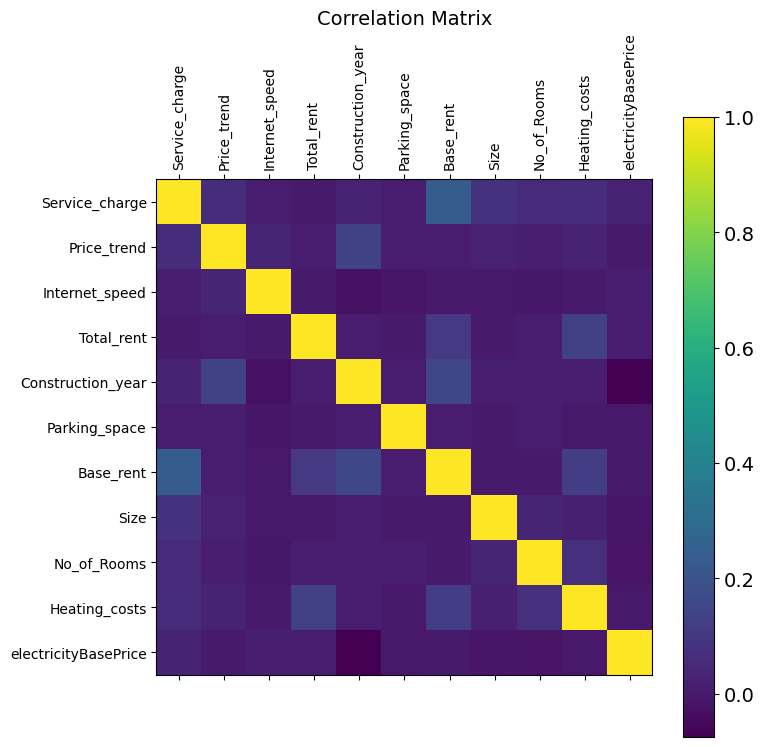

In [10]:
# creating correlation map with labels
f = plt.figure(figsize=(8,8))  
plt.matshow(df_corr.corr(), fignum=f.number) 
plt.xticks(range(df_corr.shape[1]), df_corr.columns, fontsize=10, rotation=90) 
plt.yticks(range(df_corr.shape[1]), df_corr.columns, fontsize=10) 
cb = plt.colorbar() 
cb.ax.tick_params(labelsize=14) 
plt.title('Correlation Matrix', fontsize=14)
plt.savefig("corr_all.png")  

# Create a correlation matrix heatmap (colored) in seaborn

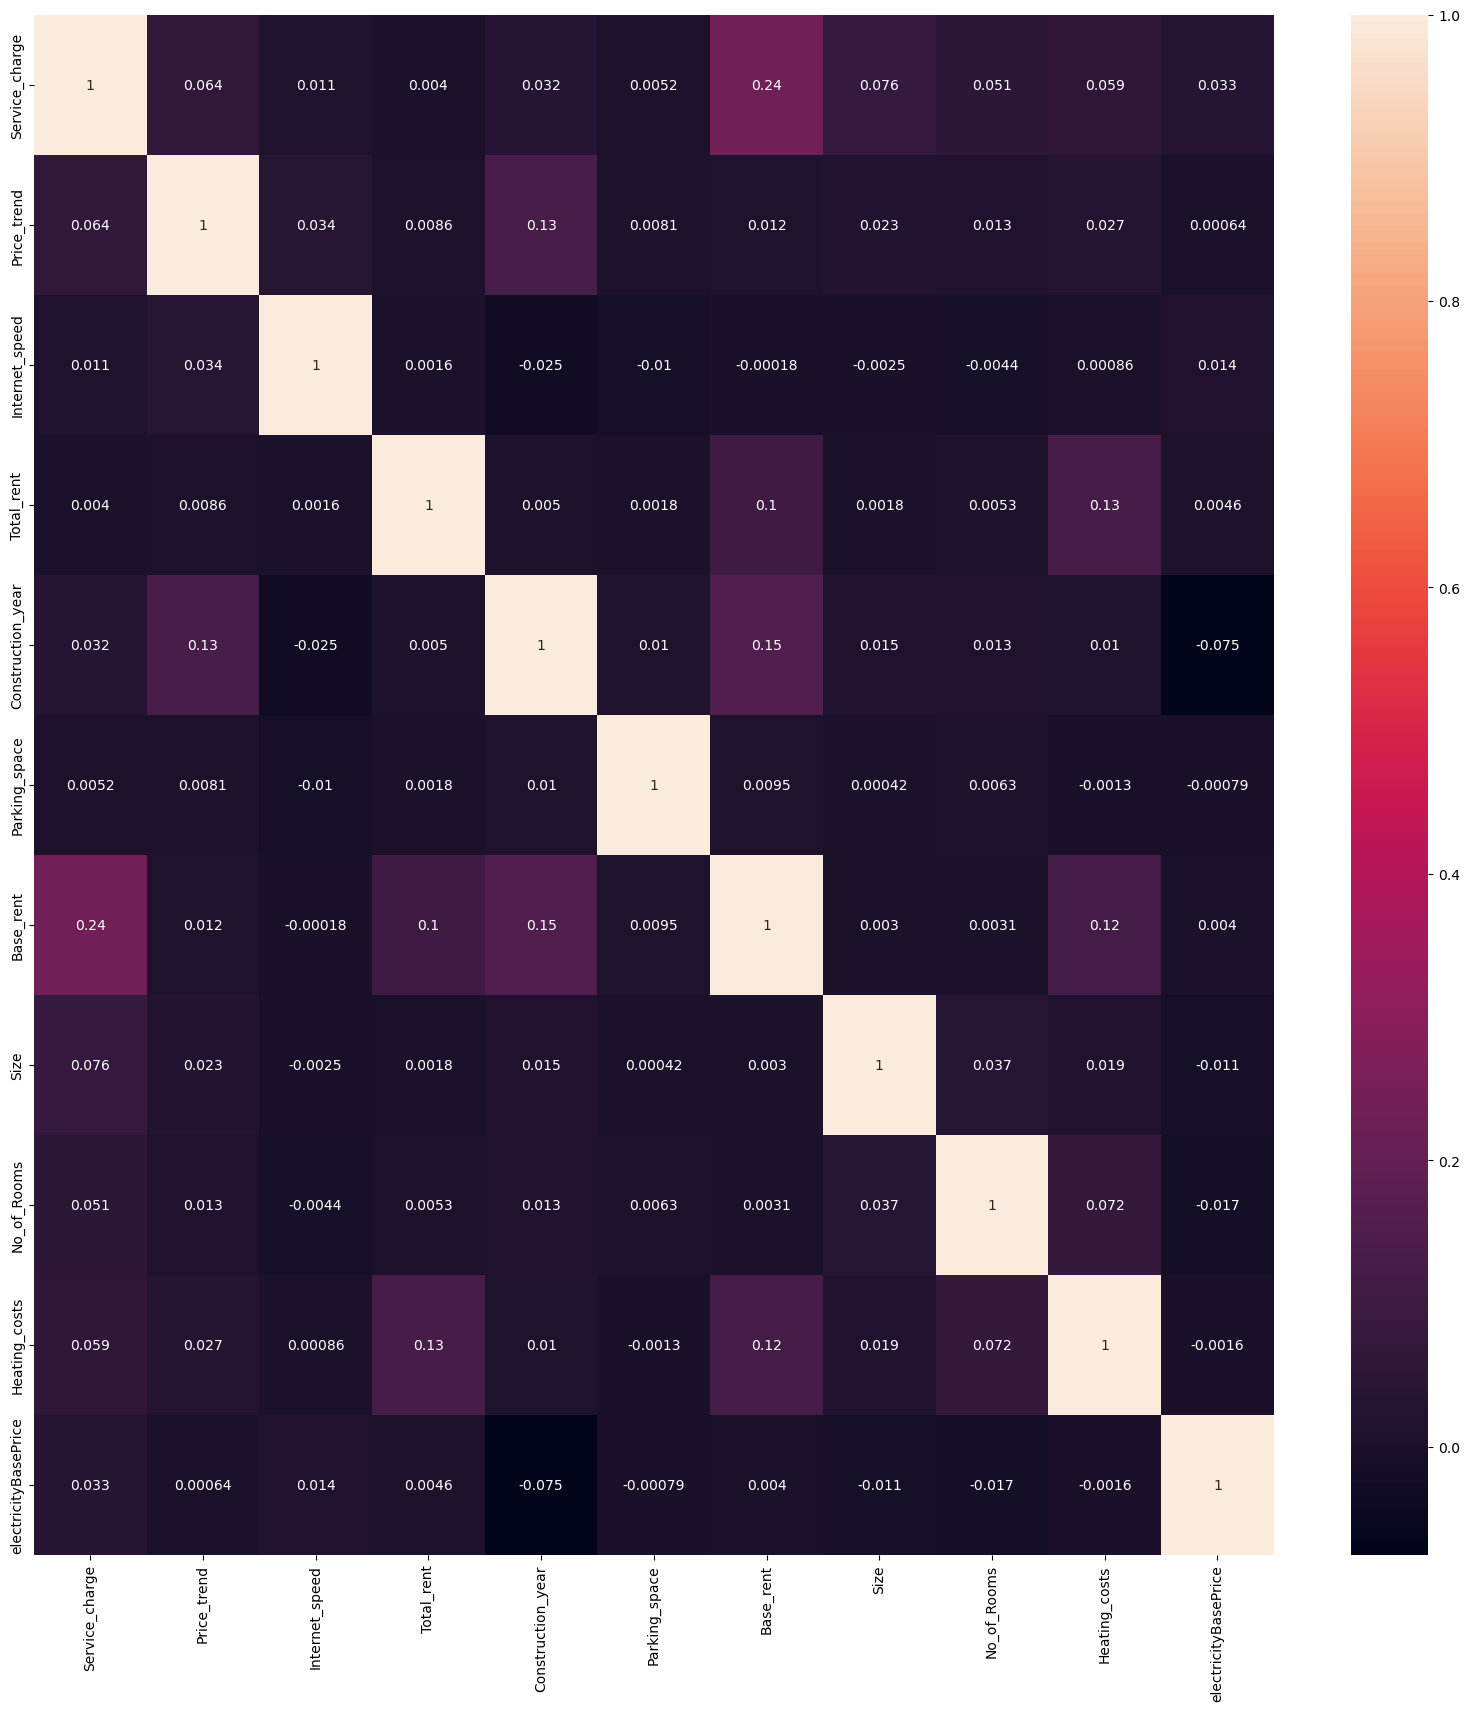

In [11]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(20,20))

# Create the correlation heatmap in seaborn 
corr = sns.heatmap(df_corr.corr(), annot = True, ax = ax) 

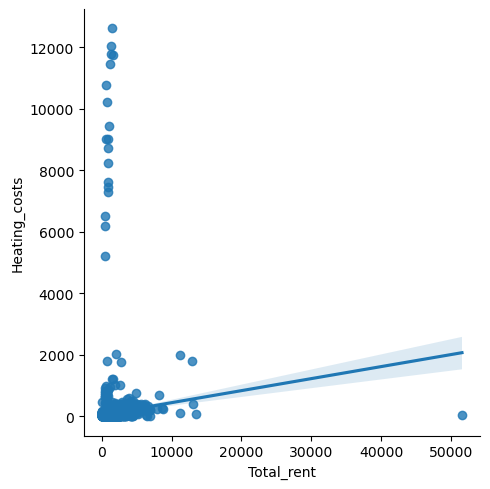

In [12]:
# Creating scatter plot for total rent  and heating costs
sns.lmplot(x = 'Total_rent', y = 'Heating_costs', data = df_all)

A correlation co-efficient of 0.13 indicates almost no relationship or weak relationship between two variables. Hence it is clear that there is no significant positive relationship between total rent and heating_costs

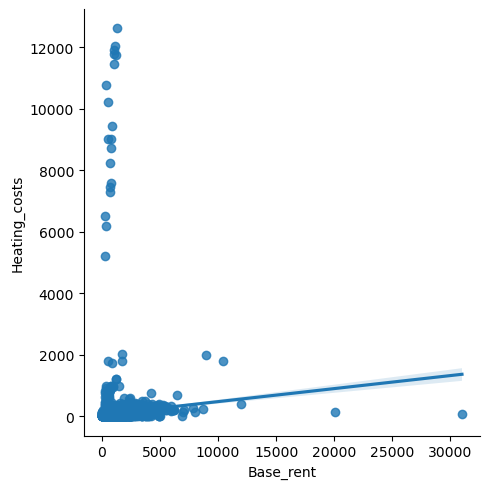

In [13]:
# Creating scatter plot for base rent and heating costs
sns.lmplot(x = 'Base_rent', y = 'Heating_costs', data = df_all)

A correlation co-efficient of 0.12 indicates almost no relationship or weak relationship between two variables. Hence it is clear that there is no significant positive relationship between base rent and heating_costs. We can also observe many outliers at the first part of the graph.

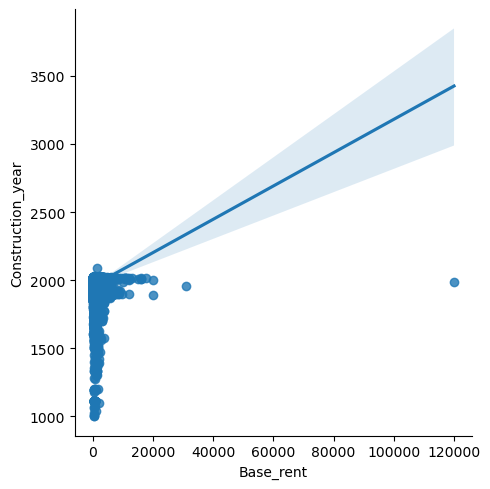

In [14]:
# Creating scatter plot for base rent and construction year
sns.lmplot(x = 'Base_rent', y = 'Construction_year', data = df_all)

Base rent and Construction year have a correlation co-efficient of 0.15 which also indicates weak relationship. 

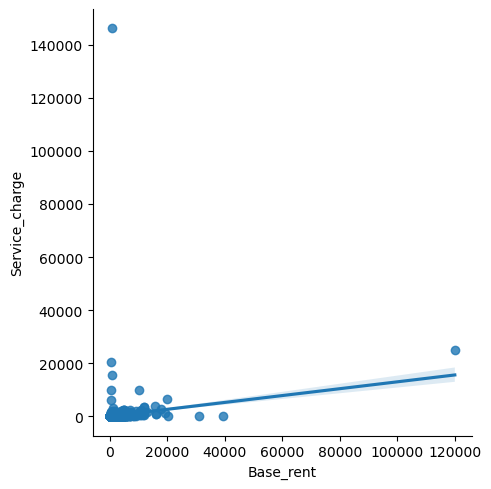

In [15]:
# Creating scatter plot for base rent and service charge
sns.lmplot(x = 'Base_rent', y = 'Service_charge', data = df_all)

the correlation co-efficient is 0.24 which also indicates a weak relationship between base rent and service charge.

# Creating pair plot 

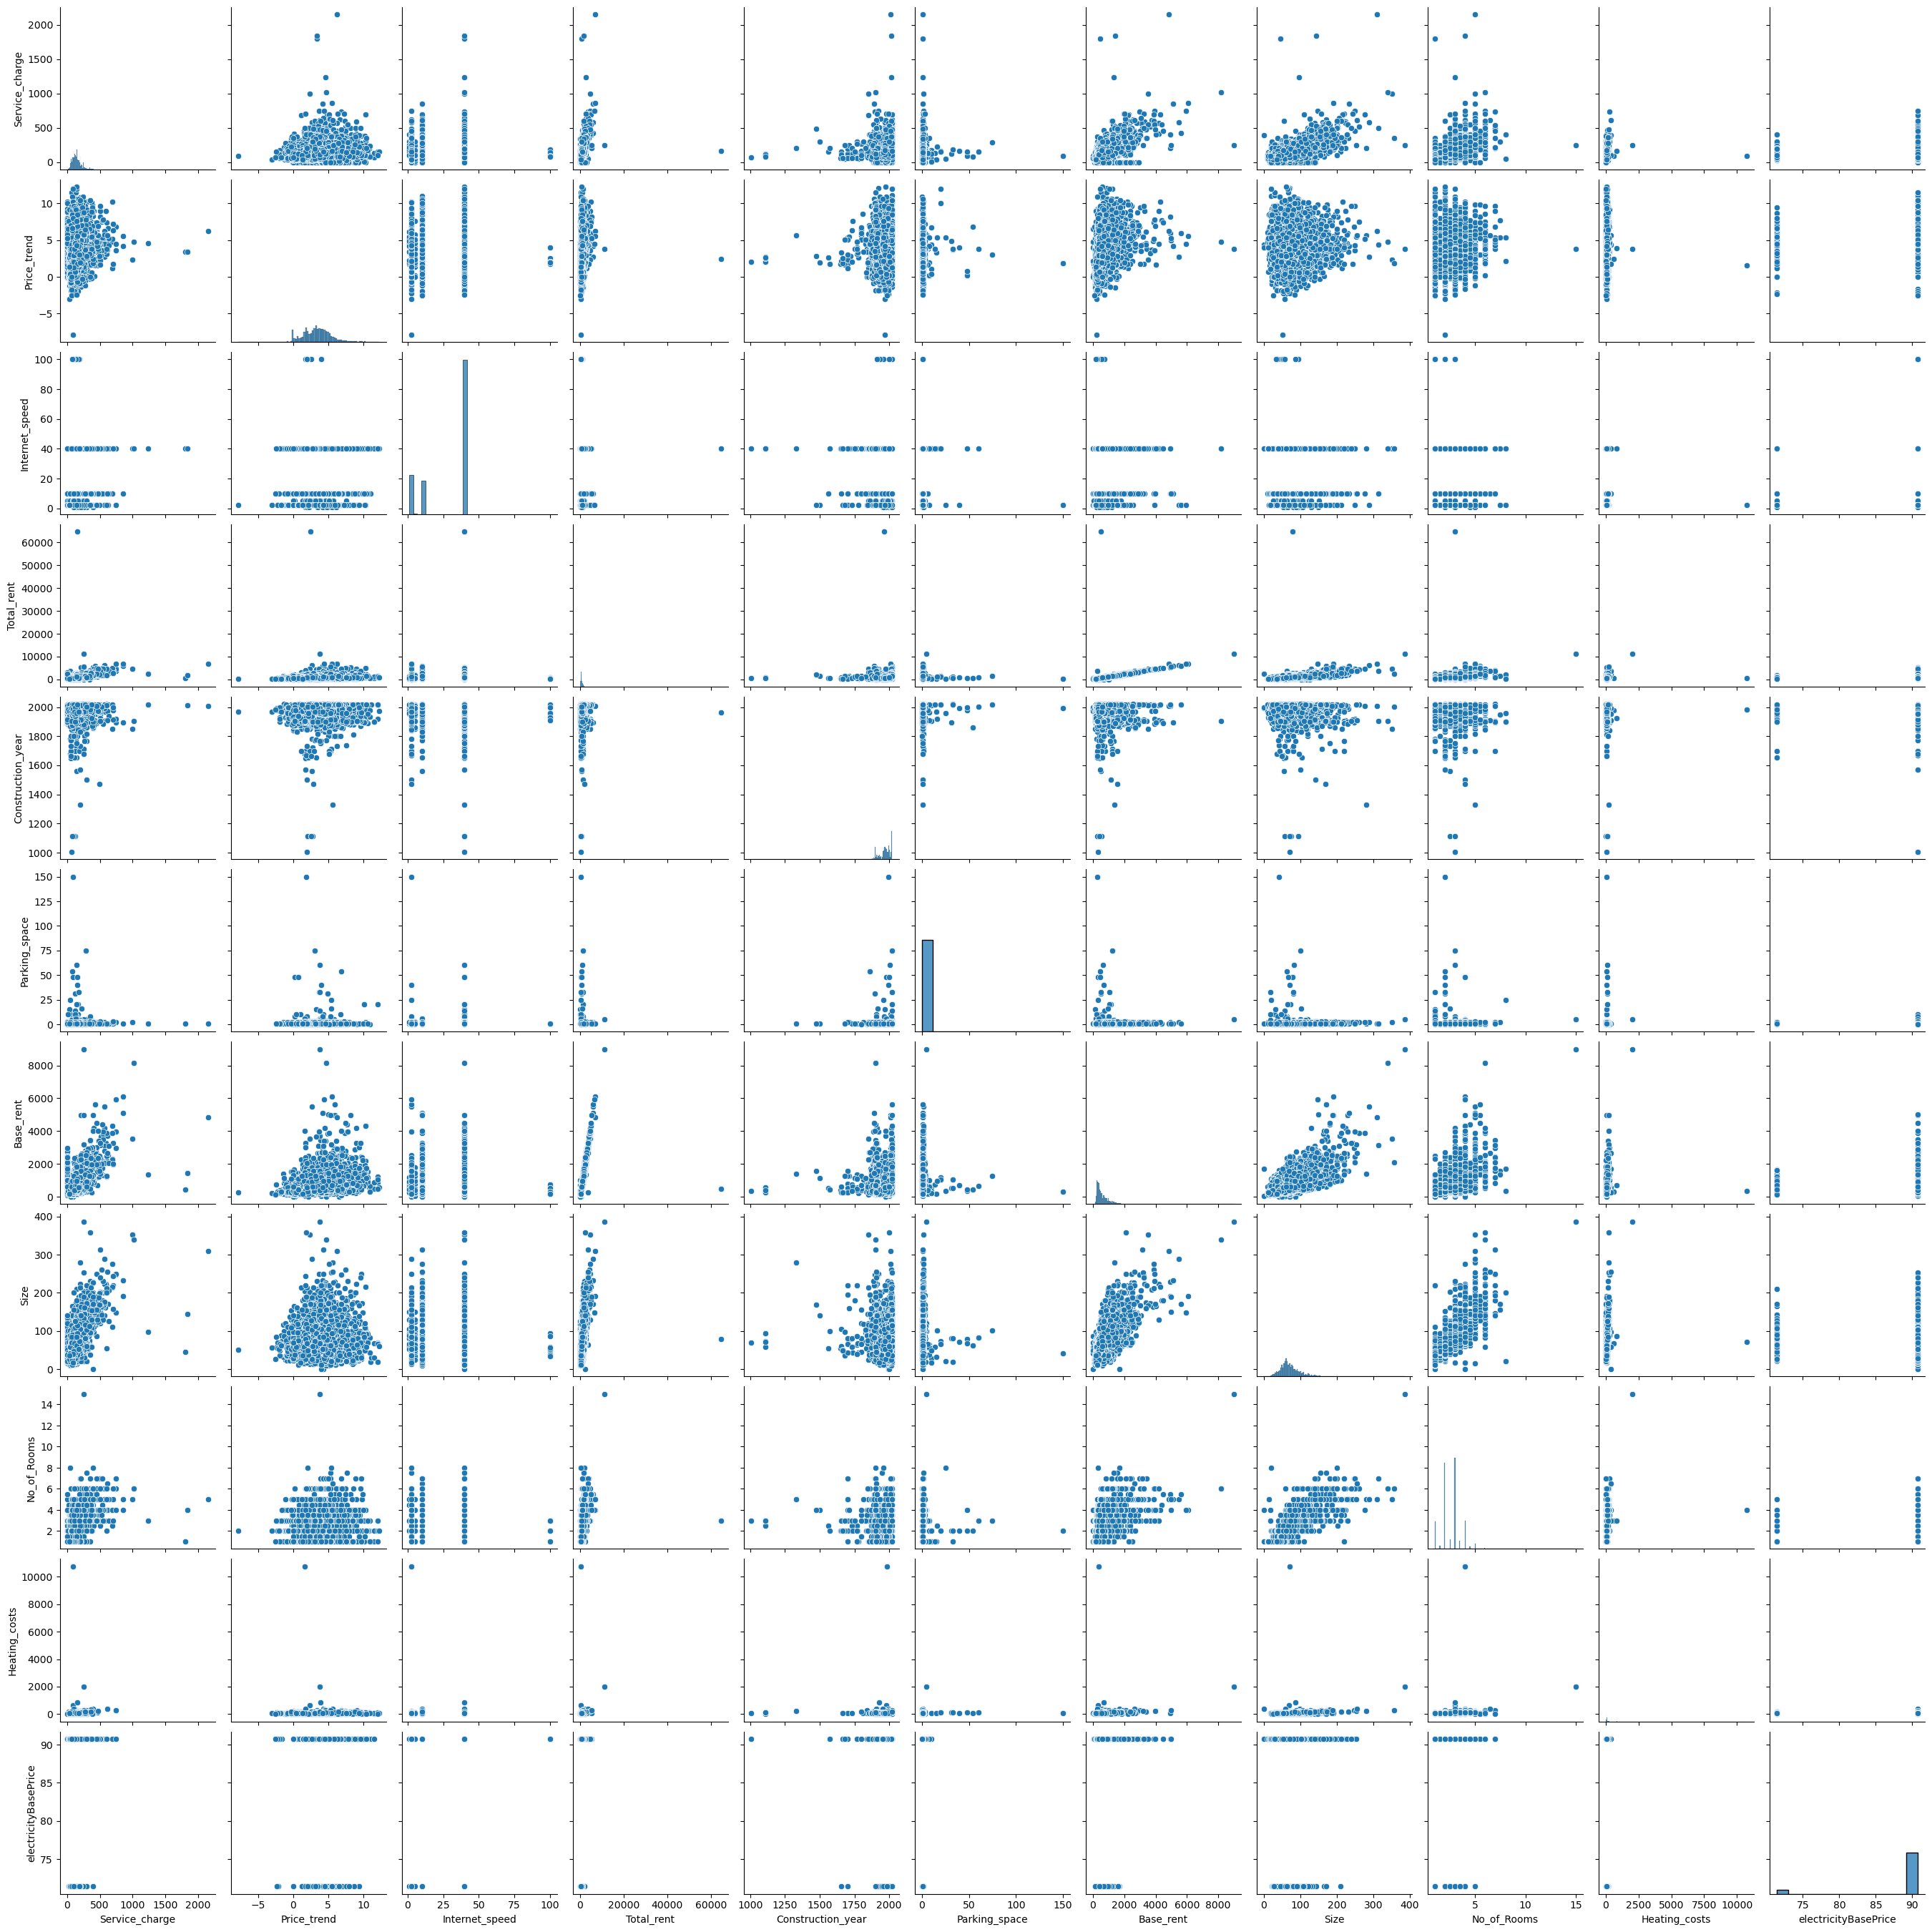

In [16]:
# Create a pair plot of sample dataset
sns.pairplot(df_corr.sample(10000))
plt.show()

 It is seen based on the plot that there are additional correlations such as electricity price and size and no. of rooms whcih can be explored further.

In [17]:
# Checking for categorical variables
df_corr.columns

Index(['Service_charge', 'Price_trend', 'Internet_speed', 'Total_rent',
       'Construction_year', 'Parking_space', 'Base_rent', 'Size',
       'No_of_Rooms', 'Heating_costs', 'electricityBasePrice'],
      dtype='object')

<Axes: xlabel='Construction_year', ylabel='Count'>

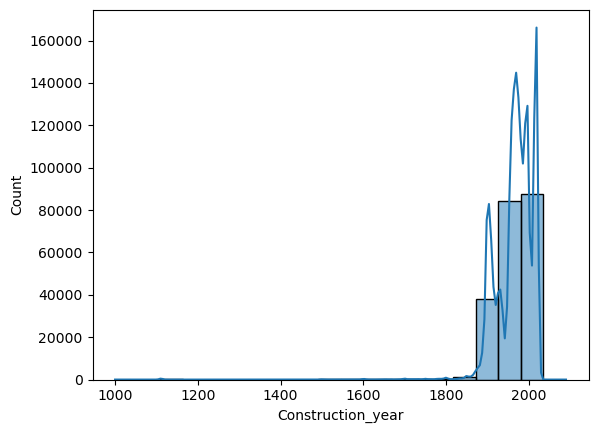

In [18]:
# Creating categorical variable
sns.histplot(df_corr['Construction_year'], bins = 20, kde = True)

In [19]:
df_corr.loc[df_corr['Construction_year'] < 1900, 'Construction'] = 'Old'

C:\Users\Shruthi\AppData\Local\Temp\ipykernel_14228\1498033182.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr.loc[df_corr['Construction_year'] < 1900, 'Construction'] = 'Old'


In [20]:
df_corr.loc[(df_corr['Construction_year'] >= 1900) & (df_corr['Construction_year'] < 1950), 'Construction'] = 'Moderate'

In [21]:
df_corr.loc[df_corr['Construction_year'] >= 1950, 'Construction'] = 'New'

In [22]:
df_corr['Construction'].value_counts(dropna = False)

New         159497
NaN          57045
Moderate     44328
Old           7980
Name: Construction, dtype: int64

In [23]:
df_corr.columns

Index(['Service_charge', 'Price_trend', 'Internet_speed', 'Total_rent',
       'Construction_year', 'Parking_space', 'Base_rent', 'Size',
       'No_of_Rooms', 'Heating_costs', 'electricityBasePrice', 'Construction'],
      dtype='object')

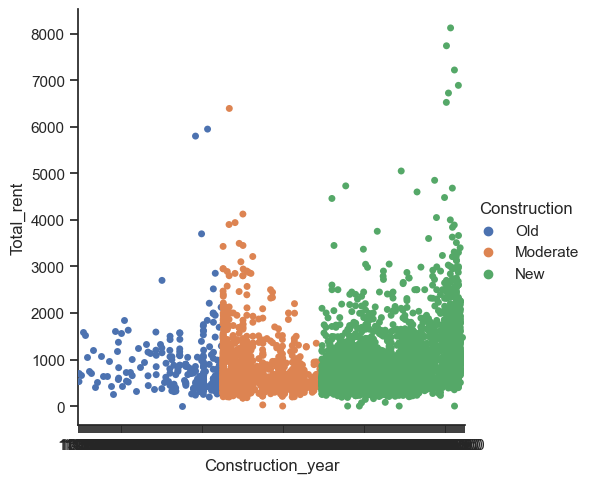

In [29]:
# Create a categorical plot in seaborn using the Construction year category created above
sns.set(style="ticks")
g = sns.catplot(x="Construction_year", y="Total_rent", hue="Construction", data=df_corr.sample(10000))
plt.show()

We can see from the graph that there is no much difference in construction year and the total rent. However, the newly constructed ones have higher costs compared to older ones.

# Key questions
What is the average rental price in different cities of Germany? 
-> the average rent in germany is around 900 euros 
What factors contribute to the variations in rental prices across different states? 
->Yes, but there is no huge correlation between the rental price and the factors such as Heating costs, Internet, Size etc
What factors are affecting the rental prices in Germany? 
-> There are no factors which are hugely impacting the rental prices in germany based on the analysis so far

# Hypotheses
The rental prices vary by cities
Higher the size of the apartment, lower the internet speed
As the number of rooms increase, the internet speed decrease